# Detrend light curves using citlalicue
## Oscar Barragán, Sept. 2020
### Powered by [PyTransit](https://github.com/hpparvi/PyTransit) and [george](https://github.com/dfm/george)

# Example to detrend the light curve of Pi Men as observed by _TESS_ in its first sector ([Gandolfi et al., (2018)](https://www.aanda.org/articles/aa/abs/2018/11/aa34289-18/aa34289-18.html); [Huang et al., (2018)](https://iopscience.iop.org/article/10.3847/2041-8213/aaef91)).

### This tutorial assumes that you have a light curve in ascii format, the light curve for this tutorial is provided [here](https://raw.githubusercontent.com/oscaribv/citlalicue/master/pimen.dat)

In [1]:
#Load basic libraries
from __future__ import print_function, division, absolute_import
import numpy as np
import matplotlib.pyplot as plt

#Import the detrend class from citlalicue
from citlalicue.detrending import detrend

#### Let us load the data, since our data file does not have a column corresponding to the error bars, we need to provide an error as an input when calling the class

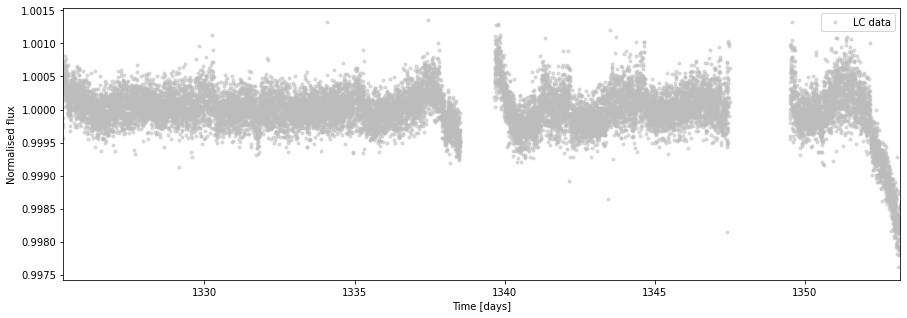

In [2]:
#Create the instance "star" using the "detrend" class
#The name of the input file in this case is "pimen.dat"
star = detrend("pimen.dat",err=2.2e-4)
#Plot the data
star.plot()

In [3]:
#Add transits, so they can be removed from the detrending routines
#pars -> [T0, P, a/R*, inclination, Rp/R*] x Number of planets
#ldc  -> u1, u2
planet_pars = [1325.503055,6.26834,13.10,np.pi/2,0.01721]
ldc = [0.41,0.17]
star.add_transits(pars=planet_pars,ldc=ldc)

### Time to create the GP object that will help us to detrend our light curve
### Citlalicue uses the kernels provided by george, now the options are "Exp", "Matern32" and "Matern52"

In [4]:
#Let us create a GP using a exponential kernel
star.get_gp(Kernel="Exp")
#This creates the GP with dummy values for the GP hyperparameters

### Let us see how the GP looks in our data with the dummy initial parameters

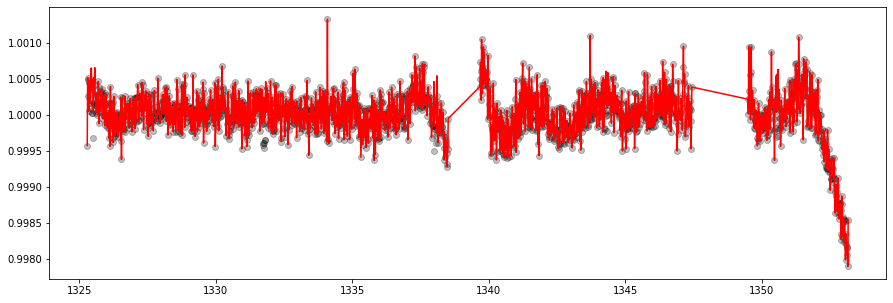

In [5]:
star.predict()

### We can now optimise for the GP hyper parameters to find the optimal values that describe our data

In [6]:
star.optimize()

TypeError: grad_neg_ln_like() missing 1 required positional argument: 'p'

### Let us see how the GP looks in our data with the optimised parameters

In [ ]:
star.predict()

### Now we have a set of values for our GP hyper parameters, we can thus detrend the light curve

In [ ]:
#This step might take long time to excecute, be patient!
star.detrend()
#Now we have a file called *detrend.dat file with the detrended light curve

### Check how the light curve looks now

In [ ]:
star.plot(save=True)

### It might be practical for transit fitting routines to fit only the light curve part with transits, we can do this by cutting the transits in the light curve

In [ ]:
star.cut_transits(windows=[4/24.])
#Now we have cut the transits and they are stored in the *_detrended_cut.dat file
#Let us plot how the new data set looks like
plt.figure(figsize=(15,5))
plt.plot(star.time_cut,star.flux_detrended_cut,'k.')
plt.plot(star.time,star.flux_planet,'r')